In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pickle

sns.set()

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print("Shape:", df.shape)
print("/nInfo:")
print(df.info())

df.describe()

Shape: (200, 5)
/nInfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df = df.drop(columns=["CustomerID"])

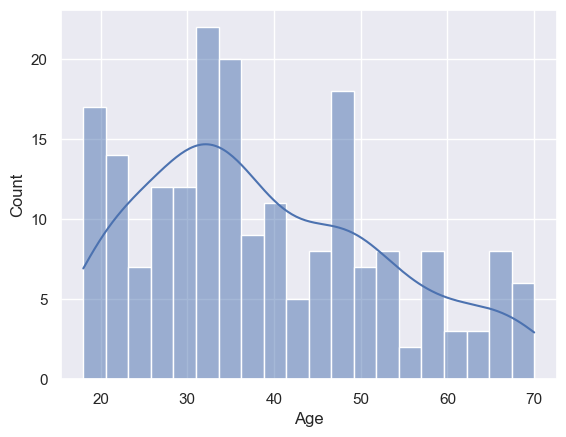

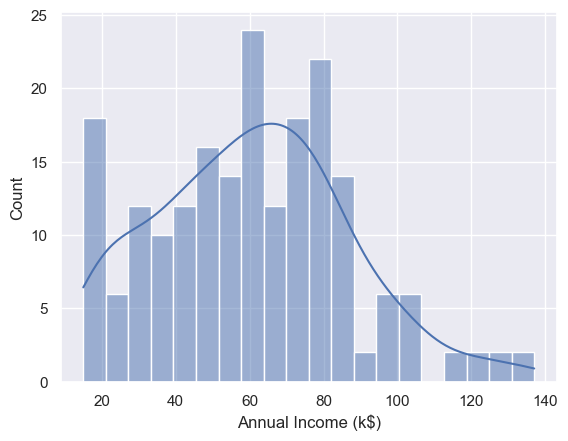

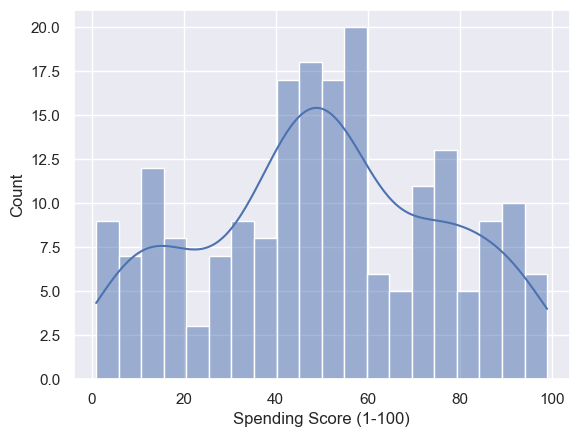

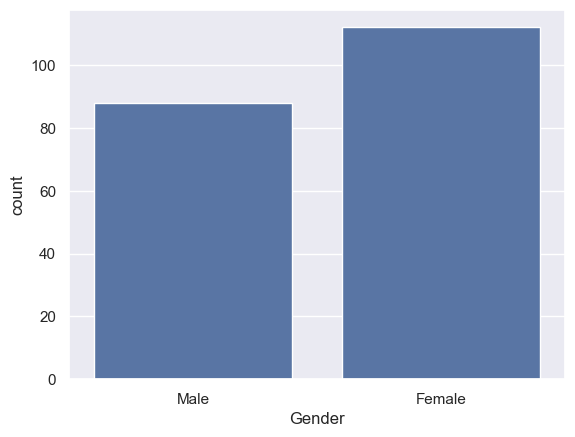

In [5]:
# Age distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.show()

# Income distribution
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.show()

# Spending Score distribution
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.show()

# Gender count
sns.countplot(x="Gender", data=df)
plt.show()


In [6]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [7]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

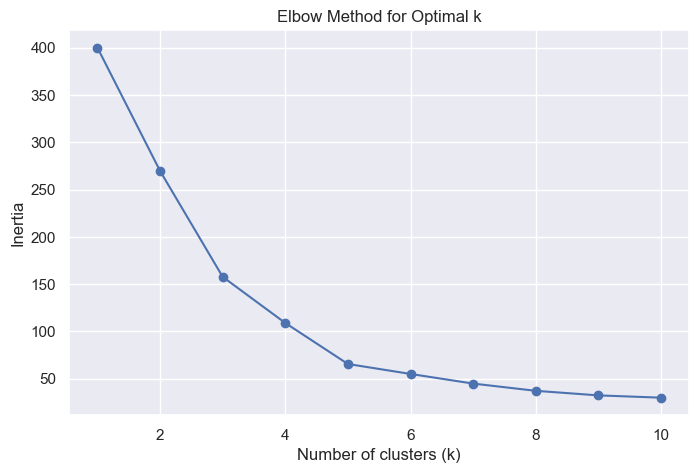

In [10]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

df["Cluster"] = y_kmeans
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

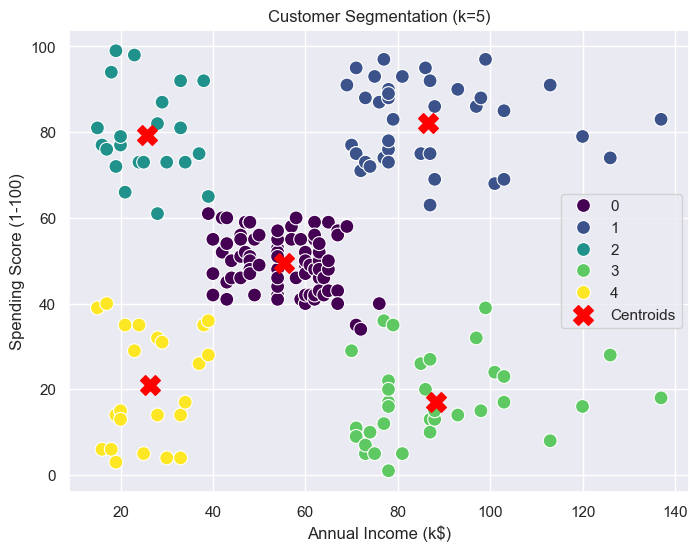

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    hue=df["Cluster"], 
    palette="viridis", 
    s=100
)

# Plot cluster centers (convert back from scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 1],
    c="red", s=200, marker="X", label="Centroids"
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (k=5)")
plt.legend()
plt.show()


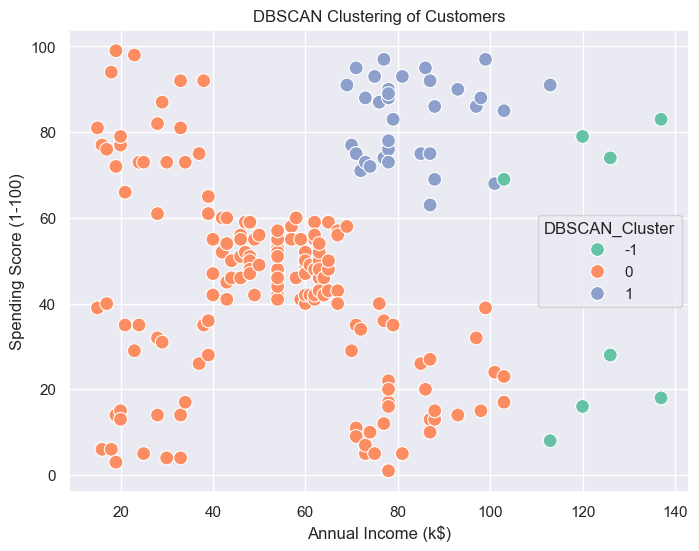

In [24]:
#DBSCAN CLUSTERING ALGORITHM
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = dbscan_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["DBSCAN_Cluster"],
    palette="Set2",
    s=100
)
plt.title("DBSCAN Clustering of Customers")
plt.show()
